# Haar Cascade Face & Eye Detection
This notebook follows the exact steps shown in the image.

**Steps:**
1. Load image/video
2. Convert to grayscale
3. Load Haar cascade XML files
4. Detect faces → draw rectangles
5. Detect eyes inside each face ROI → draw circles
6. Tune parameters (scaleFactor, minNeighbors, minSize)
7. Try on single face, group photo, rotated face


In [1]:
# Step 1: Import required libraries
import cv2
import matplotlib.pyplot as plt

In [11]:
# Step 2: Load the image 

img_path = "gr.jpg"
img = cv2.imread(img_path)

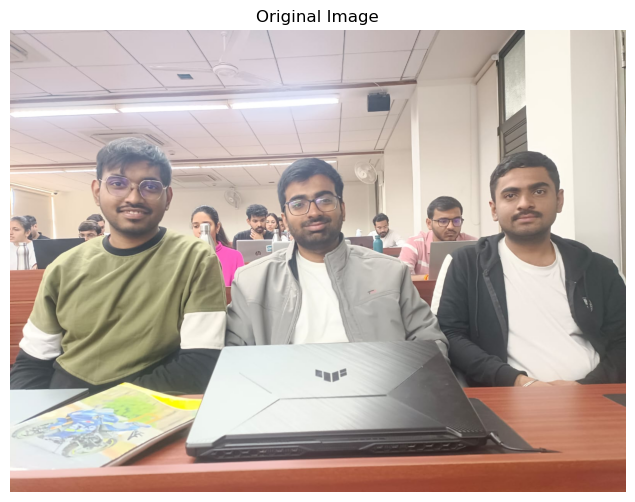

In [12]:
# Step 3: Convert image from BGR (OpenCV default) to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

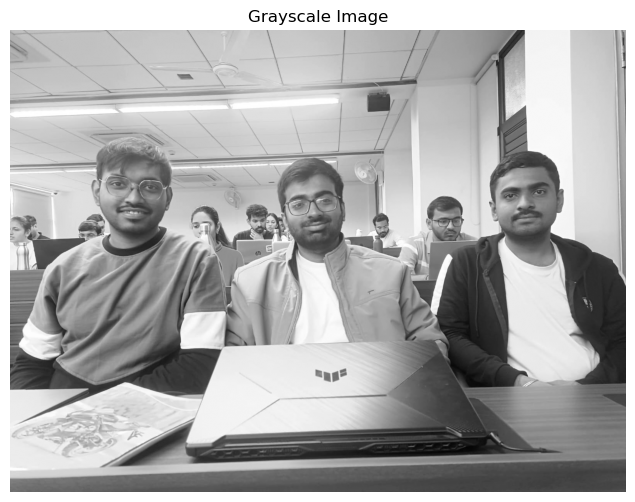

In [13]:
# Step 4: Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8,6))
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


In [14]:
# Step 5: Load pre-trained Haar cascade classifiers
# OpenCV provides these XML files already

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

print("Haar cascades loaded successfully!")

Haar cascades loaded successfully!


In [15]:
# Step 6: Detect faces in the grayscale image

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,   # how much the image size is reduced at each scale
    minNeighbors=5,    # higher = fewer false positives
    minSize=(50, 50)   # minimum face size
)

print("Number of faces detected:", len(faces))

Number of faces detected: 6


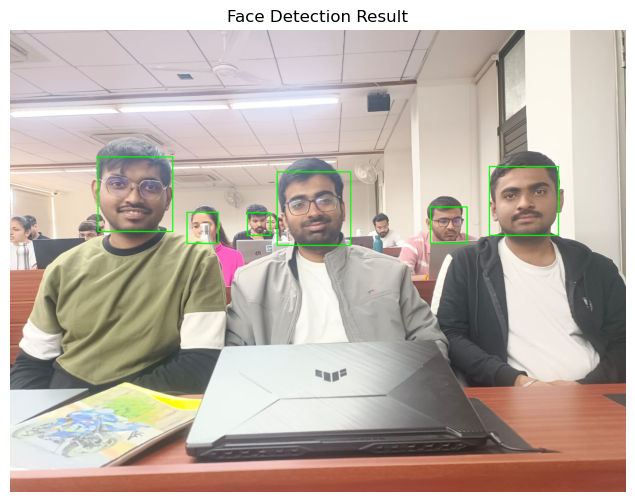

In [16]:
# Step 7: Draw rectangles around detected faces

output = img_rgb.copy()

for (x, y, w, h) in faces:
    cv2.rectangle(output, (x, y), (x+w, y+h), (0,255,0), 2)

plt.figure(figsize=(8,6))
plt.imshow(output)
plt.title("Face Detection Result")
plt.axis("off")
plt.show()

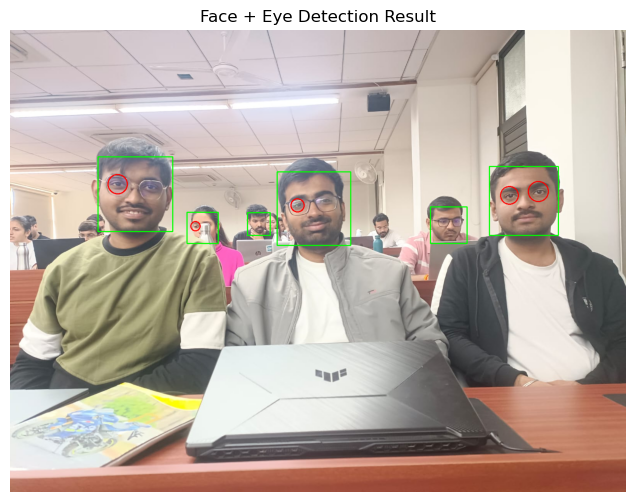

In [17]:
# Step 8: Detect eyes inside each detected face ROI
# ROI = Region of Interest (face region only)

output2 = img_rgb.copy()

for (x, y, w, h) in faces:
    # Draw face rectangle
    cv2.rectangle(output2, (x, y), (x+w, y+h), (0,255,0), 2)

    # Extract face ROI
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = output2[y:y+h, x:x+w]

    # Detect eyes within the face ROI
    eyes = eye_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=1.1,
        minNeighbors=10,
        minSize=(20, 20)
    )

    # Draw circles around eyes
    for (ex, ey, ew, eh) in eyes:
        center = (ex + ew//2, ey + eh//2)
        radius = ew//2
        cv2.circle(roi_color, center, radius, (255,0,0), 2)

plt.figure(figsize=(8,6))
plt.imshow(output2)
plt.title("Face + Eye Detection Result")
plt.axis("off")
plt.show()